In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("paper", font_scale=1.6)
sns.set_style('whitegrid')

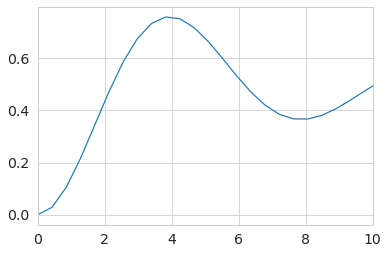

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
lti = signal.lti([1.0], [3.0, 1.0, 2])
t, y = signal.step2(lti)

ax = sns.lineplot(t, y)
ax.set_xlim([0, 10]);
# plt.xlabel('Time [s]')
# plt.ylabel('Amplitude')
# plt.title('Step response for 1. Order Lowpass')
# plt.grid()

In [3]:
def ho(x, amp, cen, wid):

    return amp/(np.sqrt((1-(x/cen)**2)**2 + (2*wid*x/cen)**2))


                
def p(x, amp, cen, wid):
    sns.lineplot(np.linspace(1, x, 100), ho(np.linspace(1, x, 100), amp, cen, wid))
    
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# inflection1=22, inflection2=60, slope1=0.2, slope2=0.1, max.sel=1, minsel.upper=1, plot=T)


interact(p, amp=widgets.IntSlider(min=1, max=100, step=1, value=1),\
        cen=widgets.IntSlider(min=0, max=100, step=1, value=10),\
        wid=widgets.FloatSlider(min=-30, max=30, step=0.01, value=-2),\
#         slope2=widgets.FloatSlider(min=-30, max=30, step=0.01, value=-1),\
#          max_sel=widgets.FloatSlider(min=-30, max=30, step=0.01, value=1),\
#         minsel_upper=widgets.FloatSlider(min=-30, max=30, step=0.01, value=0.5),\
        x=widgets.IntSlider(min=5, max=40, step=1, value=30),);

interactive(children=(IntSlider(value=30, description='x', max=40, min=5), IntSlider(value=1, description='amp…

In [24]:
# https://jckantor.github.io/CBE30338/03.06-Second-Order-Models.html

def overdamped(K, tau, zeta):
    t = np.linspace(0, 50)
    tau_1 = tau/(zeta - np.sqrt(zeta**2 - 1))
    tau_2 = tau/(zeta + np.sqrt(zeta**2 - 1))

    y = K*(1 - ((tau_1*np.exp(-t/tau_1) - tau_2*np.exp(-t/tau_2))/(tau_1 - tau_2)))
    sns.lineplot(t,y)
#     plt.grid()
    
interact(overdamped, K=(0.5,2), tau=(0.5,2), zeta=(1.01,2));



interactive(children=(FloatSlider(value=1.25, description='K', max=2.0, min=0.5), FloatSlider(value=1.25, desc…

In [11]:


def criticallydamped(K, tau):
    t = np.linspace(0,20)
    y = K*(1 - (1 + t/tau)*np.exp(-t/tau))
    plt.plot(t,y)
#     plt.grid()
    
# criticallydamped(K=2, tau=2)


 
interact(criticallydamped, K=(0.5,2), tau=(0.5,2), zeta=(1.01,2));

interactive(children=(FloatSlider(value=1.25, description='K', max=2.0, min=0.5), FloatSlider(value=1.25, desc…

In [18]:
# https://jckantor.github.io/CBE30338/03.06-Second-Order-Models.html

def underdamped(K, tau, zeta):
    t = np.linspace(0, 50)
#     t = 100 -t
#     t = -t
    c = np.cos(np.sqrt(1-zeta**2)*t/tau)
    s = np.sin(np.sqrt(1-zeta**2)*t/tau)
    
    y = K*(1 - np.exp(-zeta*t/tau)*(c + zeta*s/np.sqrt(1-zeta**2)))
    sns.lineplot(t,y);

interact(underdamped, K=(1,10, 0.5), tau=(0.5,10), zeta=(0, 0.9999, 0.0001));

#tau = 3.60, zeta = 0.30, K=0.60
#k=8.5, tau=4., zeta= 0.4


interactive(children=(FloatSlider(value=5.0, description='K', max=10.0, min=1.0, step=0.5), FloatSlider(value=…

In [13]:
def underdamped1(t, K=1.75, tau=2.75, zeta=0.40):
    t = 40 - t
#     t = 40 - t
    c = np.cos(np.sqrt(1-zeta**2)*t/tau)
    s = np.sin(np.sqrt(1-zeta**2)*t/tau)
    
    y = K*(1 - np.exp(-zeta*t/tau)*(c + zeta*s/np.sqrt(1-zeta**2)))
    return y

underdamped1(0)

1.7446738232789623

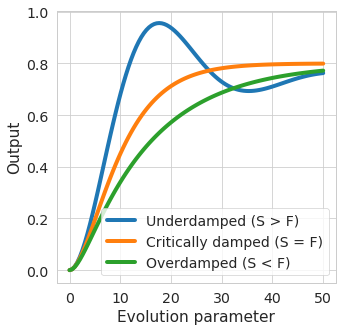

In [60]:
# https://jckantor.github.io/CBE30338/03.06-Second-Order-Models.html

def underdamped(t, K, tau, zeta):
    c = np.cos(np.sqrt(1-zeta**2)*t/tau)
    s = np.sin(np.sqrt(1-zeta**2)*t/tau)
    
    y = K*(1 - np.exp(-zeta*t/tau)*(c + zeta*s/np.sqrt(1-zeta**2)))
    return y

def overdamped(t, K, tau, zeta):
    tau_1 = tau/(zeta - np.sqrt(zeta**2 - 1))
    tau_2 = tau/(zeta + np.sqrt(zeta**2 - 1))

    y = K*(1 - ((tau_1*np.exp(-t/tau_1) - tau_2*np.exp(-t/tau_2))/(tau_1 - tau_2)))
    return y

def criticallydamped(t, K, tau):
    y = K*(1 - (1 + t/tau)*np.exp(-t/tau))
    return y



plt.figure(figsize=(5, 5))
sns.lineplot(np.linspace(0, 50, 100), underdamped(t=np.linspace(0, 50, 100), K=0.75, \
              tau=5.2, zeta=0.38), label='Underdamped (S > F)', lw=4,)
sns.lineplot(np.linspace(0, 50, 100), criticallydamped(t=np.linspace(0, 50, 100), K=0.8, \
              tau=5.3,), label='Critically damped (S = F)', lw=4,)
ax = sns.lineplot(np.linspace(0, 50, 100), overdamped(t=np.linspace(0, 50, 100), K=0.8, \
              tau=5.3, zeta=1.53), label='Overdamped (S < F)', lw=4,)
ax.set_ylabel('Output')
ax.set_xlabel('Evolution parameter');
plt.savefig('Step_response.pdf', bbox_inches = 'tight')

In [8]:
# https://jckantor.github.io/CBE30338/03.06-Second-Order-Models.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

def simulation(yref=0, U=1, K=1, tau=1, zeta=0.2):

    def deriv(X,t):
        y,v = X
        ydot = v
        vdot = -(y-yref)/tau/tau - 2*zeta*v/tau + K*U/tau/tau
        return[ydot,vdot]

    # simulation  
    t = np.linspace(0,20*tau,1000)
    y = odeint(deriv, [yref,0], t)[:,0]
    
    # plot steady state line and bounds
    plt.figure(figsize=(12,6))

    
    # plot solution
    plt.plot(t,y,lw=3)
    plt.title('Step Response of a Second Order System')
    plt.xlabel('Time')
    plt.ylabel('y')
    
    # plot limits
    plt.ylim(plt.ylim()[0],1.1*plt.ylim()[1])
    plt.xlim(t[0],t[-1])
    dy = np.diff(plt.ylim())
    
    # arrow props
    ap1 = dict(arrowstyle="->")
    ap2 = dict(arrowstyle="<->")

    if zeta < 1:
        #overshoot
        os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
        
        # time to first peak
        tp = np.pi*tau/np.sqrt(1-zeta**2)
        yp = (1+os)*K*U + yref
          
        plt.text(tp,yp+0.02*dy,"Overshoot\n b/a = {0:0.2f}".format(os), ha='center')
        plt.annotate('',xy=(tp,K*U+yref),xytext=(tp,yp),arrowprops=ap2)
        plt.text(tp,(K*U+yref+yp)/2,' b')
        plt.annotate('',xy=(tp,yref),xytext=(tp,K*U+yref),arrowprops=ap2)
        plt.text(tp,K*U/2+yref,' a')
        plt.annotate("Time to first\n peak = {0:.2f}".format(tp),
                    xy=(tp,yref), xytext=(1.2*tp,0.2*K*U+yref),arrowprops=ap1)

        # rise time
        tr = t[np.where(np.diff(np.sign(y-yref-K*U))*np.sign(K*U)>0)[0][0]]
        if tr < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(plt.xlim()[0],0.4*K*U+yref),xytext=(tr,0.4*K*U+yref),
                         arrowprops=ap2)
            plt.text(plt.xlim()[0]+tr/2,0.42*K*U+yref+0.02*dy,
                    'Rise Time\n = {0:.2f}'.format(tr),ha='center')
        
        # period
        P = 2*np.pi*tau/np.sqrt(1-zeta**2)
        if tr + P < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.plot([tr+P,tr+P],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(tr,0.4*K*U+yref),xytext=(tr+P,0.4*K*U+yref),arrowprops=ap2)
            plt.text(tr+P/2,0.42*K*U+yref+0.02*dy,'Period = {0:.2f}'.format(P), ha='center')
        
        # second peak
        if tp + P < plt.xlim()[1]:
            plt.annotate('',xy=(tp+P,K*U+yref),xytext=(tp+P,K*U*(1+os**3)+yref),
                        arrowprops=ap2)
            plt.text(tp+P,K*U*(1+os**3/2)+yref,' c')
            plt.text(tp+P,K*U*(1+os**3)+yref+0.02*dy,
                    'Decay Ratio\n c/b = {0:.2f}'.format(os**2),va='bottom',ha='center')
        
        # settling time
        ts = -np.log(0.05)*np.sqrt(1-zeta**2)*tau/zeta
        if ts < plt.xlim()[1]:
            plt.fill_between(t[t>ts],0.95*K*U+yref,1.05*K*U+yref,alpha=0.4,color='y')
            plt.text(ts,1.05*K*U+yref+0.02*dy,
                     'Settling Time\n = {0:.2f}'.format(ts),ha='center')

            
    plt.plot(plt.xlim(),[yref,yref],'k--')
    plt.plot(plt.xlim(),[K*U+yref,K*U+yref],'k--')
    
interact(simulation, yref = (-10,10,0.1), U=(0.01,5,0.01), 
         K = (-5,5,0.01), zeta=(0.01,3,0.01), tau = (0.1,5.0,0.01));


interactive(children=(FloatSlider(value=0.0, description='yref', max=10.0, min=-10.0), FloatSlider(value=1.0, …

In [9]:
# inflection1=22, inflection2=60, slope1=0.2, slope2=0.1, max.sel=1, minsel.upper=1, plot=T)

# sns.lineplot(np.arange(0, 40), [DoubleLogistic(i, 1, 1, 0.2, 0.1, 22, 30) for i in np.arange(0, 40)])
def DoubleLogistic(x, inflection1=18, inflection2=10, slope1=-0.35, slope2=-1, max_sel=1, minsel_upper=0.5,):
    '''
    https://github.com/duplisea/dublogistic
    x = x
    omega = maximum/minimum selectivity
    alpha = slope
    beta = point of inflection
    '''
    minsel_upper= 1-minsel_upper
    logistic1= max_sel/(1+np.exp(-slope1*(x-inflection1)))
    logistic2= 1-minsel_upper/(1+np.exp(-slope2*(x-inflection2)))
    sel= logistic1*logistic2
    return sel

df = pd.read_pickle('accessibility.pkl.gz')

df_ = df[['Accessibility', 'Class Name', 'Class', 'Label']].sort_values(by='Accessibility').copy()


def pltDL(df=df_, inflection1=38, inflection2=90, slope1=.3, slope2=.1, max_sel=1, minsel_upper=.4,):
    x_vals = df_['Accessibility']
    y_vals = DoubleLogistic(x=df_['Accessibility'], inflection1=inflection1, \
                           inflection2=inflection2, slope1=slope1, slope2=slope2,\
                           max_sel=max_sel, minsel_upper=minsel_upper)
    plt.plot(x_vals, y_vals);

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# inflection1=22, inflection2=60, slope1=0.2, slope2=0.1, max.sel=1, minsel.upper=1, plot=T)


interact(pltDL, inflection1=widgets.IntSlider(min=10, max=100, step=1, value=18),\
        inflection2=widgets.IntSlider(min=10, max=100, step=1, value=17),\
        slope1=widgets.FloatSlider(min=-30, max=30, step=0.01, value=-0.83),\
        slope2=widgets.FloatSlider(min=-30, max=30, step=0.01, value=-0.50),\
         max_sel=widgets.FloatSlider(min=-30, max=30, step=0.01, value=1),\
        minsel_upper=widgets.FloatSlider(min=-30, max=30, step=0.01, value=0.5),\
        x=widgets.IntSlider(min=5, max=40, step=1, value=30),);

/home/bikash/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


interactive(children=(Dropdown(description='df', options=('Accessibility', 'Class Name', 'Class', 'Label'), va…